In [25]:
import osmnx as ox
import matplotlib.pyplot as plt 
import osmnx as ox
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

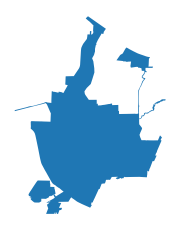

In [26]:
rochester_city = ox.geocode_to_gdf('Rochester, NY, USA')
ax = ox.project_gdf(rochester_city).plot()
_ = ax.axis('off')

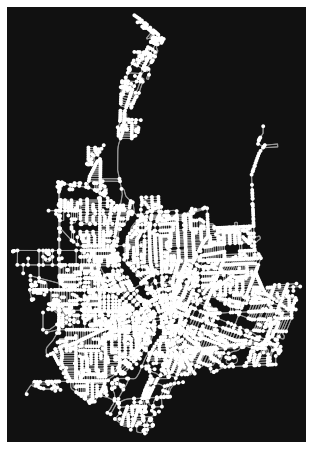

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [27]:
rochester_graph = ox.graph_from_place('Rochester, NY, USA', network_type='drive')
ox.plot_graph(rochester_graph)

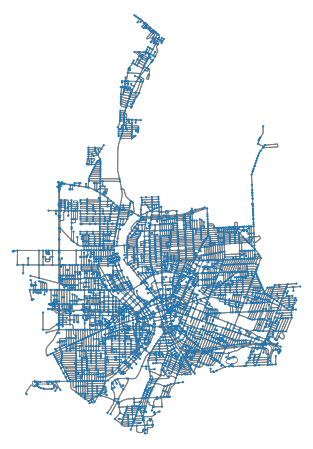

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [28]:
import matplotlib.pyplot as plt 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(rochester_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='grey', node_size=5)

In [29]:
# Sample bounding box in Rochester,SCALED
north, south, east, west = 43.149094,43.160365,77.610254,-77.593088

Exception ignored in: <function BaseGeometry.__del__ at 0x1644b5820>
Traceback (most recent call last):
  File "/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/shapely/geometry/base.py", line 242, in __del__
    self.empty(val=None)
  File "/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/shapely/geometry/base.py", line 227, in empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


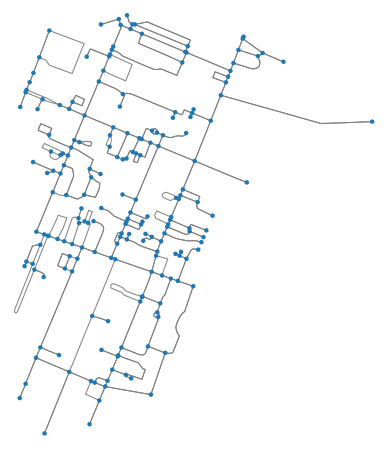

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [30]:
# create a network from the above bounded box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='gray', node_size=20)

In [31]:
#Number of nodes within the selected area
count=0
for i in G.nodes:
    count=count+1
print(count)

196


In [32]:
for i in G.nodes:
    print(i)

212627981
212627984
212639650
212657854
212657855
212667074
212667083
212668581
212668584
212681228
212688184
212821705
212821706
212823643
212839905
212839908
212846630
212851057
212851065
212851523
212859875
212859876
212859878
212884739
1242603125
1242603358
1242650173
1242650189
1242650230
1242650278
1242650326
1242650356
1242650390
1242650514
1271356345
1271356360
2610544301
2610544308
2610544319
2610544320
2610548550
2610548551
2663494480
2663494488
2663494511
2663494526
2704247173
2704247183
2704247187
2704247193
2704247195
2704247214
2704247215
2704247229
2704247261
2704247262
2704247271
2704252511
2704252514
3860925270
4127061377
4580588922
5372079272
5372079276
5372079279
5372079280
5372079281
5739904870
6026325119
6026325121
6947545648
6947545650
6947545651
6947545652
6947545653
6947545654
6947545660
6947545662
6947545663
6947545664
6947545670
6947545671
6947545672
6947545673
6947545675
6947545680
6947545681
6947545682
6947545683
6947600685
6947600698
6947600699
6947600700
6

In [33]:
#Add locations to dataframe
Locations = []
for i in G.nodes:
    Locations.append(i)

In [34]:
Locations

[212627981,
 212627984,
 212639650,
 212657854,
 212657855,
 212667074,
 212667083,
 212668581,
 212668584,
 212681228,
 212688184,
 212821705,
 212821706,
 212823643,
 212839905,
 212839908,
 212846630,
 212851057,
 212851065,
 212851523,
 212859875,
 212859876,
 212859878,
 212884739,
 1242603125,
 1242603358,
 1242650173,
 1242650189,
 1242650230,
 1242650278,
 1242650326,
 1242650356,
 1242650390,
 1242650514,
 1271356345,
 1271356360,
 2610544301,
 2610544308,
 2610544319,
 2610544320,
 2610548550,
 2610548551,
 2663494480,
 2663494488,
 2663494511,
 2663494526,
 2704247173,
 2704247183,
 2704247187,
 2704247193,
 2704247195,
 2704247214,
 2704247215,
 2704247229,
 2704247261,
 2704247262,
 2704247271,
 2704252511,
 2704252514,
 3860925270,
 4127061377,
 4580588922,
 5372079272,
 5372079276,
 5372079279,
 5372079280,
 5372079281,
 5739904870,
 6026325119,
 6026325121,
 6947545648,
 6947545650,
 6947545651,
 6947545652,
 6947545653,
 6947545654,
 6947545660,
 6947545662,
 694754566

In [35]:
roc_data = pd.DataFrame(Locations)
roc_data.rename(columns = {0:'Locations'}, inplace = True)
roc_data

,Locations
0,212627981
1,212627984
2,212639650
3,212657854
4,212657855
...,...
191,8578321915
192,8578321916
193,8578371417
194,8578371418


In [36]:
#Appending lats and longitudes
latitude = []
longitude = []
for i in Locations:
    latitude.append(G.nodes[i].get('y'))
    longitude.append(G.nodes[i].get('x'))

In [37]:
roc_data['Latitude'] = latitude
roc_data['Longitude'] = longitude

In [38]:
#Display the locations along with latitudes and longitudes in the dataframe
roc_data

,Locations,Latitude,Longitude
0,212627981,43.157850,-77.592977
1,212627984,43.158306,-77.592746
2,212639650,43.154462,-77.592100
3,212657854,43.150807,-77.591189
4,212657855,43.149171,-77.592092
...,...,...,...
191,8578321915,43.154491,-77.587721
192,8578321916,43.153816,-77.586918
193,8578371417,43.153946,-77.587319
194,8578371418,43.153999,-77.587116


In [39]:
#Converting the dataframe to a csv
roc_data.to_csv("BoxAreaRochester.csv")

In [40]:
roc_df = pd.read_csv("BoxAreaRochester.csv")

In [41]:
roc_df

,Unnamed: 0,Locations,Latitude,Longitude
0,0,212627981,43.157850,-77.592977
1,1,212627984,43.158306,-77.592746
2,2,212639650,43.154462,-77.592100
3,3,212657854,43.150807,-77.591189
4,4,212657855,43.149171,-77.592092
...,...,...,...,...
191,191,8578321915,43.154491,-77.587721
192,192,8578321916,43.153816,-77.586918
193,193,8578371417,43.153946,-77.587319
194,194,8578371418,43.153999,-77.587116


In [42]:
roc_df = roc_df.drop(['Locations'],axis=1)
roc_df.rename(columns = {'Latitude':'Left'}, inplace = True)
roc_df.rename(columns = {'Longitude':'Right'}, inplace = True)

In [43]:
roc_df

,Unnamed: 0,Left,Right
0,0,43.157850,-77.592977
1,1,43.158306,-77.592746
2,2,43.154462,-77.592100
3,3,43.150807,-77.591189
4,4,43.149171,-77.592092
...,...,...,...
191,191,43.154491,-77.587721
192,192,43.153816,-77.586918
193,193,43.153946,-77.587319
194,194,43.153999,-77.587116


In [44]:
import requests # to call the openmap/google apis -- OSRM for distances
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[0, "Right"]},{roc_df.loc[0, "Left"]};{roc_df.loc[195, "Right"]},{roc_df.loc[195, "Left"]}?overview=false""")

In [45]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"-Cj0gFQlxYkrAAAAAAAAAAAAAAAAAAAAjDg3QgAAAAAAAAAAAAAAACsAAAAAAAAAAAAAAAAAAACxRQAAbwZg-1qJkgJvBmD7WomSAgAATwHh-waA","distance":0,"location":[-77.592977,43.15785],"name":"Alexander Street"},{"hint":"7zDFifIwxYk2AAAAAAAAAAAAAAAAAAAA0MyyQQAAAAAAAAAAAAAAADYAAAAAAAAAAAAAAAAAAACxRQAAHh1g--p5kgIeHWD76nmSAgAAbxLh-waA","distance":0,"location":[-77.58717,43.153898],"name":""}],"routes":[{"legs":[{"steps":[],"weight":106.7,"distance":1009.2,"summary":"","duration":106.7}],"weight_name":"routability","weight":106.7,"distance":1009.2,"duration":106.7}]}'

In [48]:
json.loads(r.content)["routes"][0]["distance"]

1130.1

In [49]:
import json
df3 = pd.DataFrame()
for j in roc_df.index:
    list1 = []
    for i in roc_df.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[j, "Right"]},{roc_df.loc[j, "Left"]};{roc_df.loc[i, "Right"]},{roc_df.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

/var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/ipykernel_17799/2470575143.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[j] = list1


ReadTimeout: HTTPConnectionPool(host='router.project-osrm.org', port=80): Read timed out. (read timeout=None)

In [ ]:
json.loads(r.content)

In [ ]:
df3

In [ ]:
df = roc_df

In [ ]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [ ]:
df

In [ ]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

In [ ]:
distances_df = df3
distances_df

In [ ]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

In [ ]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [34]:
distance = distances_df

In [35]:
type(df.ID[0])

numpy.int64

In [36]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 55.6,
 (0, 2): 743.7,
 (0, 3): 595.3,
 (0, 4): 361.8,
 (0, 5): 233.1,
 (0, 6): 190.6,
 (0, 7): 58.4,
 (0, 8): 518.6,
 (0, 9): 285.9,
 (0, 10): 155.4,
 (0, 11): 437.4,
 (0, 12): 309.6,
 (0, 13): 259.1,
 (0, 14): 386.0,
 (0, 15): 516.1,
 (0, 16): 930.1,
 (0, 17): 162.5,
 (0, 18): 29.7,
 (1, 0): 55.6,
 (1, 2): 741.0,
 (1, 3): 650.8,
 (1, 4): 417.4,
 (1, 5): 230.4,
 (1, 6): 246.1,
 (1, 7): 113.9,
 (1, 8): 574.2,
 (1, 9): 341.5,
 (1, 10): 152.6,
 (1, 11): 492.9,
 (1, 12): 306.8,
 (1, 13): 256.4,
 (1, 14): 383.3,
 (1, 15): 571.7,
 (1, 16): 869.4,
 (1, 17): 159.8,
 (1, 18): 25.9,
 (2, 0): 743.7,
 (2, 1): 799.3,
 (2, 3): 495.7,
 (2, 4): 265.7,
 (2, 5): 510.6,
 (2, 6): 436.9,
 (2, 7): 569.1,
 (2, 8): 574.3,
 (2, 9): 341.6,
 (2, 10): 588.4,
 (2, 11): 190.1,
 (2, 12): 434.2,
 (2, 13): 484.6,
 (2, 14): 357.7,
 (2, 15): 111.4,
 (2, 16): 186.4,
 (2, 17): 581.2,
 (2, 18): 773.4,
 (3, 0): 715.5,
 (3, 1): 771.0,
 (3, 2): 495.7,
 (3, 4): 231.8,
 (3, 5): 637.9,
 (3, 6): 404.7,
 (3, 7): 536.9,
 (

In [37]:
V = 3 #the number vehicles/people deployed

In [38]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [39]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [40]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [41]:
#constraints
for v in df.ID:
    cap = 1 if v != 11 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 11 and j!= 11) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [ ]:
%time prob.solve()
print(LpStatus[prob.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/65576bcd222f4c6f91c9332a10a1880d-pulp.mps branch printingOptions all solution /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/65576bcd222f4c6f91c9332a10a1880d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 349 COLUMNS
At line 3014 RHS
At line 3359 BOUNDS
At line 3720 ENDATA
Problem MODEL has 344 rows, 360 columns and 1602 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 2136.41 - 0.00 seconds
Cgl0004I processed model has 344 rows, 360 columns (360 integer (342 of which binary)) and 1602 elements
Cutoff increment increased from 1e-05 to 0.0999
Cbc0038I Initial state - 26 integers unsatisfied sum - 8.05263
Cbc0038I Pass   1: suminf.    6.05263 (22) obj. 2635.47 iterations 44
Cbc0038I Pas

Cbc0010I After 51000 nodes, 15873 on tree, 3696.1 best solution, best possible 3094.9263 (267.72 seconds)
Cbc0010I After 52000 nodes, 16302 on tree, 3696.1 best solution, best possible 3094.9263 (273.19 seconds)
Cbc0010I After 53000 nodes, 16446 on tree, 3696.1 best solution, best possible 3094.9263 (277.17 seconds)
Cbc0010I After 54000 nodes, 16424 on tree, 3696.1 best solution, best possible 3094.9263 (280.35 seconds)
Cbc0010I After 55000 nodes, 16844 on tree, 3696.1 best solution, best possible 3094.9263 (285.79 seconds)
Cbc0010I After 56000 nodes, 17278 on tree, 3696.1 best solution, best possible 3094.9263 (291.67 seconds)
Cbc0010I After 57000 nodes, 17474 on tree, 3696.1 best solution, best possible 3094.9263 (297.27 seconds)
Cbc0010I After 58000 nodes, 17464 on tree, 3696.1 best solution, best possible 3094.9512 (301.42 seconds)
Cbc0010I After 59000 nodes, 17898 on tree, 3696.1 best solution, best possible 3094.9512 (306.91 seconds)
Cbc0010I After 60000 nodes, 18336 on tree, 369

Cbc0038I Full problem 344 rows 360 columns, reduced to 320 rows 43 columns - 1 fixed gives 317, 38 - still too large
Cbc0038I Full problem 344 rows 360 columns, reduced to 317 rows 38 columns - too large
Cbc0010I After 195000 nodes, 56449 on tree, 3696 best solution, best possible 3234.4908 (1045.43 seconds)
Cbc0010I After 196000 nodes, 56325 on tree, 3696 best solution, best possible 3234.4908 (1048.89 seconds)
Cbc0010I After 197000 nodes, 56328 on tree, 3696 best solution, best possible 3234.4908 (1052.47 seconds)
Cbc0010I After 198000 nodes, 56324 on tree, 3696 best solution, best possible 3234.4908 (1056.49 seconds)
Cbc0010I After 199000 nodes, 56326 on tree, 3696 best solution, best possible 3234.4908 (1060.30 seconds)
Cbc0010I After 200000 nodes, 56298 on tree, 3696 best solution, best possible 3234.4908 (1064.14 seconds)
Cbc0010I After 201000 nodes, 56187 on tree, 3696 best solution, best possible 3234.4908 (1067.21 seconds)
Cbc0010I After 202000 nodes, 56125 on tree, 3696 best 

Cbc0010I After 342000 nodes, 56106 on tree, 3696 best solution, best possible 3246.6124 (1669.40 seconds)
Cbc0010I After 343000 nodes, 56478 on tree, 3696 best solution, best possible 3246.6124 (1676.27 seconds)
Cbc0010I After 344000 nodes, 56457 on tree, 3696 best solution, best possible 3246.6124 (1680.63 seconds)
Cbc0010I After 345000 nodes, 56434 on tree, 3696 best solution, best possible 3246.6124 (1684.50 seconds)
Cbc0010I After 346000 nodes, 56385 on tree, 3696 best solution, best possible 3246.6124 (1688.09 seconds)
Cbc0010I After 347000 nodes, 56381 on tree, 3696 best solution, best possible 3246.6124 (1692.76 seconds)
Cbc0010I After 348000 nodes, 56380 on tree, 3696 best solution, best possible 3246.6124 (1696.24 seconds)
Cbc0010I After 349000 nodes, 56386 on tree, 3696 best solution, best possible 3246.6124 (1699.85 seconds)
Cbc0010I After 350000 nodes, 56378 on tree, 3696 best solution, best possible 3246.6124 (1704.05 seconds)
Cbc0010I After 351000 nodes, 56378 on tree, 36

Cbc0010I After 496000 nodes, 56161 on tree, 3696 best solution, best possible 3252.8205 (2346.73 seconds)
Cbc0010I After 497000 nodes, 56098 on tree, 3696 best solution, best possible 3252.8205 (2350.41 seconds)
Cbc0010I After 498000 nodes, 56530 on tree, 3696 best solution, best possible 3255.7394 (2357.67 seconds)
Cbc0010I After 499000 nodes, 56440 on tree, 3696 best solution, best possible 3255.7394 (2361.79 seconds)
Cbc0010I After 500000 nodes, 56393 on tree, 3696 best solution, best possible 3255.7394 (2366.18 seconds)
Cbc0010I After 501000 nodes, 56392 on tree, 3696 best solution, best possible 3255.7394 (2370.36 seconds)
Cbc0010I After 502000 nodes, 56393 on tree, 3696 best solution, best possible 3255.7394 (2374.84 seconds)
Cbc0010I After 503000 nodes, 56400 on tree, 3696 best solution, best possible 3255.7394 (2379.81 seconds)
Cbc0010I After 504000 nodes, 56358 on tree, 3696 best solution, best possible 3255.7394 (2388.51 seconds)
Cbc0010I After 505000 nodes, 56214 on tree, 36

Cbc0010I After 649000 nodes, 56285 on tree, 3696 best solution, best possible 3263.111 (3131.69 seconds)
Cbc0010I After 650000 nodes, 56284 on tree, 3696 best solution, best possible 3263.111 (3137.34 seconds)
Cbc0010I After 651000 nodes, 56278 on tree, 3696 best solution, best possible 3263.111 (3143.03 seconds)
Cbc0010I After 652000 nodes, 56285 on tree, 3696 best solution, best possible 3263.111 (3148.88 seconds)
Cbc0010I After 653000 nodes, 56276 on tree, 3696 best solution, best possible 3263.111 (3154.33 seconds)
Cbc0010I After 654000 nodes, 56288 on tree, 3696 best solution, best possible 3263.111 (3159.68 seconds)
Cbc0010I After 655000 nodes, 56284 on tree, 3696 best solution, best possible 3263.111 (3163.44 seconds)
Cbc0010I After 656000 nodes, 56279 on tree, 3696 best solution, best possible 3263.111 (3168.63 seconds)
Cbc0010I After 657000 nodes, 56277 on tree, 3696 best solution, best possible 3263.111 (3174.17 seconds)
Cbc0010I After 658000 nodes, 56289 on tree, 3696 best s

Cbc0010I After 803000 nodes, 56524 on tree, 3696 best solution, best possible 3280.1883 (4447.37 seconds)
Cbc0010I After 804000 nodes, 56520 on tree, 3696 best solution, best possible 3280.1883 (4458.85 seconds)
Cbc0010I After 805000 nodes, 56516 on tree, 3696 best solution, best possible 3280.1883 (4470.57 seconds)
Cbc0010I After 806000 nodes, 56517 on tree, 3696 best solution, best possible 3280.1883 (4482.09 seconds)
Cbc0010I After 807000 nodes, 56519 on tree, 3696 best solution, best possible 3280.1883 (4491.52 seconds)
Cbc0010I After 808000 nodes, 56519 on tree, 3696 best solution, best possible 3280.1883 (4501.12 seconds)
Cbc0010I After 809000 nodes, 56520 on tree, 3696 best solution, best possible 3280.1883 (4510.57 seconds)
Cbc0010I After 810000 nodes, 56517 on tree, 3696 best solution, best possible 3280.1883 (4520.21 seconds)
Cbc0010I After 811000 nodes, 56516 on tree, 3696 best solution, best possible 3280.1883 (4529.74 seconds)
Cbc0010I After 812000 nodes, 56519 on tree, 36

Cbc0010I After 956000 nodes, 56416 on tree, 3696 best solution, best possible 3291.1762 (5834.53 seconds)
Cbc0010I After 957000 nodes, 56318 on tree, 3696 best solution, best possible 3291.1762 (5840.17 seconds)
Cbc0010I After 958000 nodes, 56125 on tree, 3696 best solution, best possible 3291.1762 (5845.97 seconds)
Cbc0010I After 959000 nodes, 56424 on tree, 3696 best solution, best possible 3291.1762 (5854.74 seconds)
Cbc0010I After 960000 nodes, 56350 on tree, 3696 best solution, best possible 3291.1762 (5860.45 seconds)
Cbc0010I After 961000 nodes, 56237 on tree, 3696 best solution, best possible 3291.1762 (5865.93 seconds)
Cbc0010I After 962000 nodes, 56088 on tree, 3696 best solution, best possible 3291.1762 (5870.97 seconds)
Cbc0010I After 963000 nodes, 56393 on tree, 3696 best solution, best possible 3291.1762 (5879.91 seconds)
Cbc0010I After 964000 nodes, 56342 on tree, 3696 best solution, best possible 3291.1762 (5885.08 seconds)
Cbc0010I After 965000 nodes, 56341 on tree, 36

Cbc0010I After 1109000 nodes, 56419 on tree, 3696 best solution, best possible 3305.0188 (6727.48 seconds)
Cbc0010I After 1110000 nodes, 56274 on tree, 3696 best solution, best possible 3305.0188 (6732.49 seconds)
Cbc0010I After 1111000 nodes, 56101 on tree, 3696 best solution, best possible 3305.0188 (6737.64 seconds)
Cbc0010I After 1112000 nodes, 56388 on tree, 3696 best solution, best possible 3305.0188 (6744.25 seconds)
Cbc0010I After 1113000 nodes, 56355 on tree, 3696 best solution, best possible 3305.0188 (6747.89 seconds)
Cbc0010I After 1114000 nodes, 56271 on tree, 3696 best solution, best possible 3305.0188 (6752.33 seconds)
Cbc0010I After 1115000 nodes, 56148 on tree, 3696 best solution, best possible 3305.0188 (6757.12 seconds)
Cbc0010I After 1116000 nodes, 56421 on tree, 3696 best solution, best possible 3305.02 (6764.66 seconds)
Cbc0010I After 1117000 nodes, 56311 on tree, 3696 best solution, best possible 3305.02 (6769.62 seconds)
Cbc0010I After 1118000 nodes, 56111 on tr

Cbc0010I After 1261000 nodes, 56333 on tree, 3696 best solution, best possible 3330.8333 (7423.13 seconds)
Cbc0010I After 1262000 nodes, 56330 on tree, 3696 best solution, best possible 3330.8333 (7426.66 seconds)
Cbc0010I After 1263000 nodes, 56334 on tree, 3696 best solution, best possible 3330.8333 (7430.54 seconds)
Cbc0010I After 1264000 nodes, 56334 on tree, 3696 best solution, best possible 3330.8333 (7434.67 seconds)
Cbc0010I After 1265000 nodes, 56336 on tree, 3696 best solution, best possible 3330.8333 (7438.83 seconds)
Cbc0010I After 1266000 nodes, 56333 on tree, 3696 best solution, best possible 3330.8333 (7443.02 seconds)
Cbc0010I After 1267000 nodes, 56335 on tree, 3696 best solution, best possible 3330.8333 (7447.42 seconds)
Cbc0010I After 1268000 nodes, 56337 on tree, 3696 best solution, best possible 3330.8333 (7451.62 seconds)
Cbc0010I After 1269000 nodes, 56335 on tree, 3696 best solution, best possible 3330.8333 (7455.61 seconds)
Cbc0010I After 1270000 nodes, 56333 o

Cbc0010I After 1414000 nodes, 56051 on tree, 3696 best solution, best possible 3349.5091 (8058.49 seconds)
Cbc0010I After 1415000 nodes, 56298 on tree, 3696 best solution, best possible 3349.5091 (8063.45 seconds)
Cbc0010I After 1416000 nodes, 56200 on tree, 3696 best solution, best possible 3349.5091 (8066.77 seconds)
Cbc0010I After 1417000 nodes, 56023 on tree, 3696 best solution, best possible 3349.5091 (8070.52 seconds)
Cbc0010I After 1418000 nodes, 56362 on tree, 3696 best solution, best possible 3351.688 (8076.93 seconds)
Cbc0010I After 1419000 nodes, 56278 on tree, 3696 best solution, best possible 3351.688 (8080.81 seconds)
Cbc0010I After 1420000 nodes, 56113 on tree, 3696 best solution, best possible 3351.688 (8084.27 seconds)
Cbc0010I After 1421000 nodes, 56151 on tree, 3696 best solution, best possible 3351.688 (8088.39 seconds)
Cbc0010I After 1422000 nodes, 56478 on tree, 3696 best solution, best possible 3353.5376 (8094.74 seconds)
Cbc0010I After 1423000 nodes, 56382 on tr

In [ ]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [ ]:
routes = get_next_loc(11)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=11:
        r.append(get_next_loc(r[-1][1])[-1])

In [ ]:
routes

In [ ]:
routes1 = routes

In [ ]:
import numpy as np
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

In [ ]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 1
    data['depot'] = 6
    return data

In [ ]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [ ]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

In [ ]:
routes